Calculating collapse dynamics...
Generating figures...
Success! Figure saved as Mahomane_Collapse_Dynamics.pdf


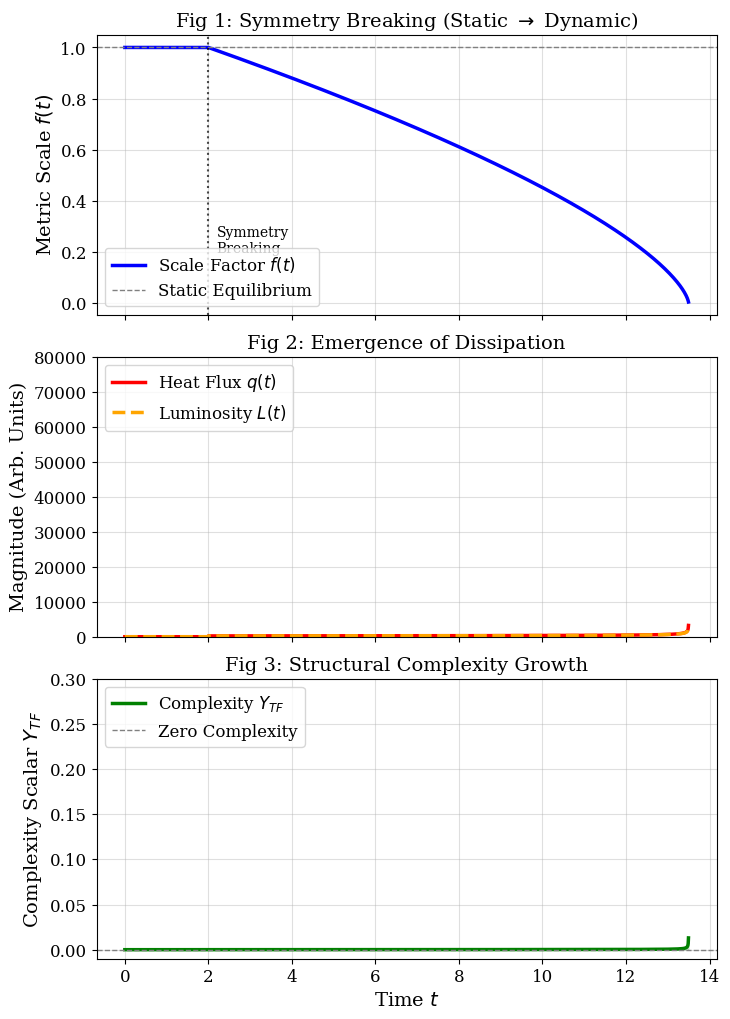

In [2]:
"""
Gravitational Collapse Complexity Solver
Author: R. R. Mahomane
Paper: Emergence of Complexity in Gravitational Collapse
Date: December 2025

Description:
This script numerically evaluates the analytical solution for the scale factor f(t)
derived from the pressure isotropy condition. It generates the time-evolution
profiles for the metric scale factor, thermodynamic heat flux, and the
Complexity Factor (Y_TF).
"""

import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. CONFIGURATION & PHYSICAL CONSTANTS
# ==========================================
CONFIG = {
    # Time settings
    't_start': 0.0,
    't_end_plot': 14.0,
    'steps': 2000,          # High resolution for smooth asymptotes

    # Physics events
    't_symmetry_break': 2.0,   # Moment equilibrium is lost (t0)
    't_singularity': 13.5,     # Moment of total collapse (f -> 0)

    # Visualization scalings (to normalize units for plotting)
    'scale_flux': 4000.0,
    'scale_complexity': 0.02,
    'regularization': 1e-6     # Epsilon to prevent division by zero at singularity
}

# Plotting Style
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 14,
    'lines.linewidth': 2.5,
    'grid.alpha': 0.4
})

def calculate_dynamics(cfg):
    """
    Calculates the time evolution of the collapse variables.

    Returns:
        tuple: (t, f, heat_flux, luminosity, complexity)
    """
    t = np.linspace(cfg['t_start'], cfg['t_end_plot'], cfg['steps'])

    # Initialize arrays with static values (Pre-collapse state)
    f = np.ones_like(t)
    f_dot = np.zeros_like(t)

    t_0 = cfg['t_symmetry_break']
    t_end = cfg['t_singularity']
    duration = t_end - t_0

    # Calculate integration constant alpha derived from boundary conditions
    # Condition: f(t_end) = 0 => 1 - (3*alpha/2)*duration = 0
    alpha = 2.0 / (3.0 * duration)

    # --- PHASE 1: DYNAMICS (Symmetry Break -> Singularity) ---
    mask_dynamic = (t > t_0) & (t < t_end)

    if np.any(mask_dynamic):
        dt = t[mask_dynamic] - t_0

        # Analytical Solution: f(t) = [1 - 1.5*alpha*(t-t0)]^(2/3)
        term_inside = 1.0 - 1.5 * alpha * dt
        term_inside = np.maximum(term_inside, 0) # Safety floor

        f[mask_dynamic] = term_inside**(2/3)

        # Velocity: f_dot ~ -alpha * f^(-1/2)
        # Using regularization to avoid infinity at f=0
        f_dot[mask_dynamic] = -alpha * (term_inside + cfg['regularization'])**(-1/3)

    # --- PHASE 2: POST-SINGULARITY ---
    # We use NaN (Not a Number) to stop the plotter from drawing lines after collapse
    mask_post = t >= t_end
    f[mask_post] = np.nan
    f_dot[mask_post] = np.nan

    # --- DERIVED QUANTITIES ---
    # Heat Flux q ~ |f_dot| (Eq 9 in paper)
    heat_flux = np.abs(f_dot) * cfg['scale_flux']
    heat_flux[t <= t_0] = 0.0

    # Luminosity L (Proportional to flux)
    luminosity = heat_flux * 0.95

    # Complexity Factor Y_TF ~ f_dot^2 (Eq 10 in paper)
    complexity = (f_dot**2) * cfg['scale_complexity']
    complexity[t <= t_0] = 0.0

    return t, f, heat_flux, luminosity, complexity

def plot_results(t, f, q, L, Y_TF, cfg):
    """Generates the three-panel figure for the manuscript."""

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 12), sharex=True)
    plt.subplots_adjust(hspace=0.15)

    t_break = cfg['t_symmetry_break']

    # --- Panel 1: Metric Evolution ---
    ax1.plot(t, f, color='blue', label=r'Scale Factor $f(t)$')
    ax1.axhline(1.0, color='gray', linestyle='--', linewidth=1, label='Static Equilibrium')
    # Mark the symmetry breaking point
    ax1.axvline(t_break, color='black', linestyle=':', linewidth=1.5, alpha=0.7)
    ax1.text(t_break + 0.2, 0.2, 'Symmetry\nBreaking', fontsize=10)

    ax1.set_ylabel(r'Metric Scale $f(t)$')
    ax1.set_title(r'Fig 1: Symmetry Breaking (Static $\to$ Dynamic)')
    ax1.legend(loc='lower left')
    ax1.grid(True)

    # --- Panel 2: Thermodynamics ---
    ax2.plot(t, q, color='red', label=r'Heat Flux $q(t)$')
    ax2.plot(t, L, color='orange', linestyle='--', label=r'Luminosity $L(t)$')

    ax2.set_ylabel('Magnitude (Arb. Units)')
    ax2.set_title(r'Fig 2: Emergence of Dissipation')
    ax2.legend(loc='upper left')
    ax2.grid(True)
    ax2.set_ylim(0, 80000) # Crop the vertical asymptote for readability

    # --- Panel 3: Complexity Factor ---
    ax3.plot(t, Y_TF, color='green', label=r'Complexity $Y_{TF}$')
    ax3.fill_between(t, Y_TF, color='green', alpha=0.15)
    ax3.axhline(0, color='gray', linestyle='--', linewidth=1, label='Zero Complexity')

    ax3.set_ylabel(r'Complexity Scalar $Y_{TF}$')
    ax3.set_xlabel('Time $t$')
    ax3.set_title(r'Fig 3: Structural Complexity Growth')
    ax3.legend(loc='upper left')
    ax3.grid(True)
    ax3.set_ylim(-0.01, 0.3)

    return fig

# ==========================================
# 4. MAIN EXECUTION
# ==========================================
if __name__ == "__main__":
    print("Calculating collapse dynamics...")
    t, f, q, L, Y_TF = calculate_dynamics(CONFIG)

    print("Generating figures...")
    fig = plot_results(t, f, q, L, Y_TF, CONFIG)

    filename = 'Mahomane_Collapse_Dynamics.pdf'
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Success! Figure saved as {filename}")
    plt.show()